In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
sns.set_context("notebook", rc={"lines.linewidth": 2})
import statistics as stat
import random
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

pd.set_option("display.max_columns", None)

# <span style='color:green'> **[done]** </span>Loading pre-processed data

In [2]:
loc = 'data/'
file = 'ufc_data.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.head(3)

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.88,0.73,0,5,1,0,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,5.0,0,187.96,118.80,190.50,Southpaw,29.0,4.10,0.49,4.46,0.45,0.00,0.00,0.52,0.0
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71,2,3,0,0,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


In [3]:
df = df.rename(columns={'w/l':'result','fighter':'match','w_fighter':'fighter','l_fighter':'opponent'})
df['result'] = 'win'
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['match','kd','str','td','sub'])
df.head(3)

,result,weight class,method,round,time,date,fighter,opponent,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.88,0.73,0,5,1,0,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,5.0,0,187.96,118.80,190.50,Southpaw,29.0,4.10,0.49,4.46,0.45,0.00,0.00,0.52,0.0
1,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71,2,3,0,0,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **'f_'** </span> - Fighter statistic column
* <span style='color:blue'> **'o_'** </span> - Opponent statistic column

In [4]:
# create winner vs opponent data table

for column in df.columns:
    if column.startswith('w_') == True:
        df = df.rename(columns={column:'f_'+column[2:]})
    elif column.startswith('l_') == True:
        df = df.rename(columns={column:'o_'+column[2:]})
        
df.columns    

Index(['result', 'weight class', 'method', 'round', 'time', 'date', 'fighter',
       'opponent', 'f_kd', 'o_kd', 'f_str', 'o_str', 'f_td', 'o_td', 'f_sub',
       'o_sub', 'f_win_perc', 'o_win_perc', 'f_win_strk', 'o_win_strk',
       'f_lose_strk', 'o_lose_strk', 'ttime', 'f_wins', 'f_losses', 'f_draws',
       'f_height', 'f_weight', 'f_reach', 'f_stance', 'f_age', 'f_slpm',
       'f_str. acc.', 'f_sapm', 'f_str. def', 'f_td avg.', 'f_td acc.',
       'f_td def.', 'f_sub. avg.', 'o_wins', 'o_losses', 'o_draws', 'o_height',
       'o_weight', 'o_reach', 'o_stance', 'o_age', 'o_slpm', 'o_str. acc.',
       'o_sapm', 'o_str. def', 'o_td avg.', 'o_td acc.', 'o_td def.',
       'o_sub. avg.'],
      dtype='object')

# <span style='color:green'> **[done]** </span>Feature Y
1. get randome rows & swap stats between fighters  
2. change result to "lose"
** this way first fighter will not always be the winner

### <span style='color:green'> **[done]** </span> Function setup:
 * <span style='color:green'> **[done]** </span> get_stat(index, data, stat, corner)
 * <span style='color:green'> **[done]** </span> get_swaped_row(index, data=df)

In [5]:
def get_stat(index, data=df, stat='height', fo=''):
    return data.loc[index, fo + stat]

In [6]:
def get_swaped_row(index, data=df):
    
    '''return row with opponent as winner and statistics swapped'''
    
    swapped_row = np.array([])
    
    for column in data.columns:
        
        if column.find('f_') > -1: # f_ will get opponent stats
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column[2:], fo='o_'))
        elif column.find('o_') > -1: # o_ will get fighter stats
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column[2:], fo='f_'))          
        elif column == 'result':
            swapped_row = np.append(swapped_row, 'lose')
        elif column == 'fighter':
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat='opponent'))
        elif column == 'opponent':
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat='fighter'))
        else:
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column))
    
    return swapped_row

In [7]:
original_size = len(df)

for index in range(0,original_size): 
    print('%d%% Completed' %(round((index/original_size)*100,2)), end ='\r')
    if random.random() > 0.5:
        df.loc[index] = get_swaped_row(index, data=df)

print('\nDone')        
df['result'].value_counts()
df.head(3)

99% Completed
Done


,result,weight class,method,round,time,date,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.
0,lose,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,1,1,29,110,0,0,0,0,0.73,0.88,5,0,0,1,14.383,15.0,5.0,0,187.96,118.80,190.50,Southpaw,29.0,4.10,0.49,4.46,0.45,0.00,0.00,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5
1,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,lose,Middleweight,U-DEC:,3,5:00,2022-09-03,Joaquin Buckley,Nassourdine Imavov,0,0,46,51,0,2,0,2,0.71,0.75,3,2,0,0,15.000,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

# <span style='color:green'> **[done]** </span> Feature Engineering = past fight's statistics:

In [8]:
for column in ['kd','str','td','sub']:
    df[column + '_dif'] = df['f_' + column] - df['o_' + column]
    df = df.drop(columns=['f_' + column, 'o_' + column])
df.head(1)

,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif
0,lose,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,0.73,0.88,5,0,0,1,14.383,15.0,5.0,0,187.96,118.8,190.5,Southpaw,29.0,4.1,0.49,4.46,0.45,0.0,0.0,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,0,-81,0,0


<AxesSubplot:xlabel='result', ylabel='sub_dif'>

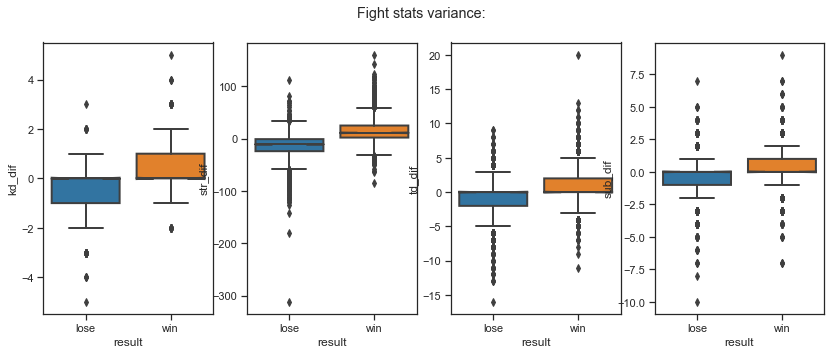

In [9]:
rows=1
cols=4
fig, axs = plt.subplots(rows,cols,figsize = (14,5))
fig.suptitle('Fight stats variance:')

sns.boxplot(ax=axs[0], x='result', y='kd_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='str_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[3], x='result', y='sub_dif', data=df,notch=True, showcaps=True)

fight stats contain significant varince > will be included as features

In [10]:
new_features = ['kd_dif','str_dif','td_dif','sub_dif']
for column in new_features:
    df[column] = (df[column] - np.mean(df[column]))/np.std(df[column])

df[new_features].head()    

,kd_dif,str_dif,td_dif,sub_dif
0,0.002599,-3.045557,0.016048,0.034102
1,0.002599,1.541595,0.411124,0.034102
2,0.002599,-0.187987,-0.774104,-1.663470
3,1.356194,0.752003,0.016048,0.034102
4,0.002599,-0.451184,-1.169179,0.882888


In [11]:
features = []
new_features = ['kd_dif','str_dif','td_dif','sub_dif']

for feature in new_features:
    features.append(feature)
    df[feature] = df[feature]

print('+ Features:')    
print(features)    

+ Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = TakeDowns:
Exploring takedowns as feature using the following columns:
* <span style='color:blue'> **TD Avg.** </span> column
* <span style='color:blue'> **TD Acc.** </span> column
* <span style='color:blue'> **TD Def.** </span> column

In [12]:
tdf = (df[['result','fighter','opponent','f_td avg.','f_td acc.','f_td def.','o_td avg.','o_td acc.','o_td def.']]).copy()
tdf.head(3)

,result,fighter,opponent,f_td avg.,f_td acc.,f_td def.,o_td avg.,o_td acc.,o_td def.
0,lose,Tai Tuivasa,Ciryl Gane,0.00,0.00,0.52,0.62,0.21,0.55
1,win,Robert Whittaker,Marvin Vettori,0.82,0.37,0.84,1.89,0.44,0.74
2,lose,Joaquin Buckley,Nassourdine Imavov,1.35,0.30,0.66,0.95,0.23,0.76


In [13]:
columns = ['td avg.','td acc.','td def.']
for column in columns:
    tdf[column + '_dif'] = tdf['f_' + column] - tdf['o_' + column]
    tdf[column + '_dif'] = (tdf[column + '_dif'] - np.mean(tdf[column + '_dif']))/np.std(tdf[column + '_dif'])
    
tdf = tdf[['result','td avg._dif','td acc._dif','td def._dif']]   
tdf.head()

,result,td avg._dif,td acc._dif,td def._dif
0,lose,-0.321766,-0.724971,-0.100173
1,win,-0.573028,-0.233787,0.336079
2,lose,0.247761,0.257397,-0.335077
3,win,-0.584195,-0.198702,0.134732
4,lose,-1.650663,-2.093269,-2.012967


<AxesSubplot:xlabel='result', ylabel='td avg._dif'>

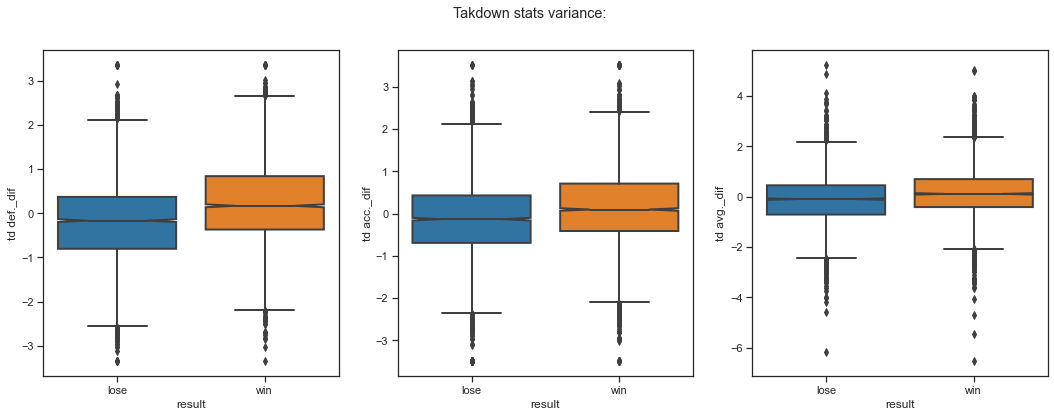

In [14]:
rows=1
cols=3
fig, axs = plt.subplots(rows,cols,figsize = (18,6))
fig.suptitle('Takdown stats variance:')

sns.boxplot(ax=axs[0], x='result', y='td def._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='td acc._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td avg._dif', data=tdf,notch=True, showcaps=True)

takedowns statistics contain variance > will be included as features

In [15]:
new_features = tdf.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = tdf[feature]

print('Features:')    
print(features)    

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Submissions:
Exploring submissions as feature using the following columns:
* <span style='color:blue'> **Sub. Avg.** </span> column = average submission attempts

In [16]:
columns = ['result','fighter', 'opponent','f_sub. avg.','o_sub. avg.']
sub_df = (df[columns]).copy()
sub_df.head(3)

,result,fighter,opponent,f_sub. avg.,o_sub. avg.
0,lose,Tai Tuivasa,Ciryl Gane,0.0,0.5
1,win,Robert Whittaker,Marvin Vettori,0.0,0.6
2,lose,Joaquin Buckley,Nassourdine Imavov,0.0,2.4


In [17]:
column = 'sub. avg.'
sub_df[column + '_dif'] = sub_df['f_' + column] - sub_df['o_' + column]
    
sub_df = sub_df[['result', column+'_dif']]   
sub_df.head()

,result,sub. avg._dif
0,lose,-0.5
1,win,-0.6
2,lose,-2.4
3,win,0.0
4,lose,1.0


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

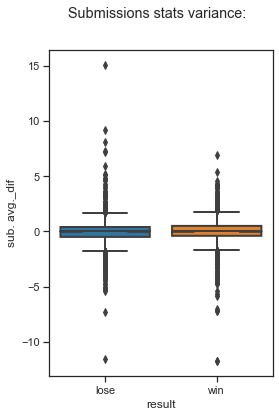

In [18]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=sub_df, notch=True, showcaps=True)

it seems there is no impact of sub average on the fight outcome, 
i will check what is the case with fights that ended with submission:

In [19]:
mask = df['method'].str.contains('SUB:')
test_sub_df = (df.loc[mask, ['result','fighter','opponent','f_sub. avg.','o_sub. avg.']]).copy()
test_sub_df['sub. avg._dif'] = test_sub_df['f_sub. avg.'] - test_sub_df['o_sub. avg.']
test_sub_df.head()

,result,fighter,opponent,f_sub. avg.,o_sub. avg.,sub. avg._dif
11,win,Stephanie Egger,Ailin Perez,0.8,0.0,0.8
39,lose,Pete Williams,Frank Mir,0.9,2.0,-1.1
40,win,Matt Serra,Kelly Dullanty,0.9,0.0,0.9
43,win,Jacare Souza,Chris Camozzi,1.3,0.5,0.8
47,win,Francisco Trinaldo,Mike Rio,0.5,1.0,-0.5


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

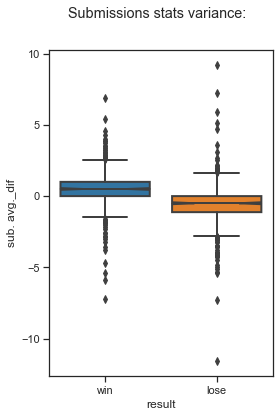

In [20]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=test_sub_df, notch=True, showcaps=True)

after filtering only the fights that ended with submissions we see significant impact of "sub average", i will use it as a feature due to the fact that submission have big impact of how fighters fight(even though it might not end with sub)

In [21]:
column = 'sub. avg._dif'
sub_df[column] = (sub_df[column] - np.mean(sub_df[column]))/np.std(sub_df[column])
sub_df = sub_df[[column]] 

In [22]:
feature = 'sub. avg._dif'
features.append(feature)
df[feature] = sub_df[feature]
    
print(features)   

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Striking:

* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)

In [23]:
str_df = (df[['result','fighter','opponent','method','f_slpm','o_slpm','f_str. acc.','o_str. acc.','f_sapm','o_sapm','f_str. def','o_str. def','str_dif']]).copy()
str_df.head()

,result,fighter,opponent,method,f_slpm,o_slpm,f_str. acc.,o_str. acc.,f_sapm,o_sapm,f_str. def,o_str. def,str_dif
0,lose,Tai Tuivasa,Ciryl Gane,KO/TKO:Punches,4.10,5.11,0.49,0.59,4.46,2.25,0.45,0.62,-3.045557
1,win,Robert Whittaker,Marvin Vettori,U-DEC:,4.48,4.20,0.42,0.44,3.26,3.58,0.61,0.59,1.541595
2,lose,Joaquin Buckley,Nassourdine Imavov,U-DEC:,3.61,4.08,0.32,0.54,3.42,2.43,0.54,0.62,-0.187987
3,win,Roman Kopylov,Alessio Di Chirico,KO/TKO:Punches,3.44,3.32,0.44,0.39,3.81,3.44,0.60,0.61,0.752003
4,lose,Jarno Errens,William Gomis,U-DEC:,1.33,2.13,0.37,0.45,2.13,1.33,0.54,0.62,-0.451184


In [24]:
columns = ['slpm','str. acc.','sapm','str. def']
for column in columns:
    str_df[column + '_dif'] = str_df['f_' + column] - str_df['o_' + column]
    str_df[column + '_dif'] = (str_df[column + '_dif'] - np.mean(str_df[column + '_dif']))/np.std(str_df[column + '_dif'])
    
str_df = str_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif', columns[3] +'_dif']]   
str_df.head()

,result,slpm_dif,str. acc._dif,sapm_dif,str. def_dif
0,lose,-0.653889,-0.803783,1.341925,-1.445210
1,win,0.160835,-0.154232,-0.208765,0.156732
2,lose,-0.312842,-1.778109,0.594161,-0.686395
3,win,0.059784,0.414125,0.214150,-0.096206
4,lose,-0.521260,-0.641395,0.477706,-0.686395


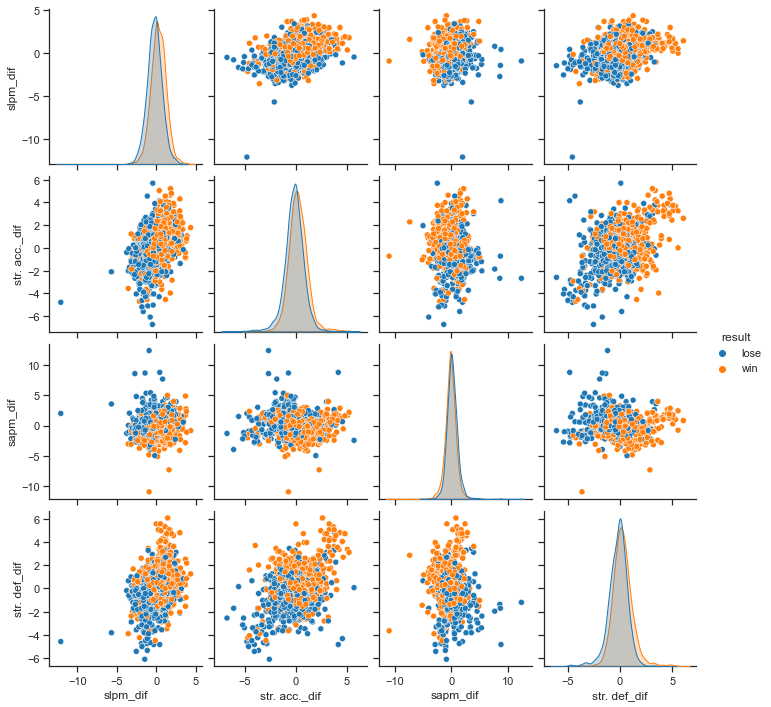

In [25]:
sns.pairplot(data=str_df, hue="result")

striking differences causing variance between fighters win & lose > will be included as features

In [26]:
new_features = str_df.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = str_df[feature]

print('Features:')    
print(features)  

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Height:

In [27]:
hdf = (df[['result','fighter','opponent','method','weight class','f_height','o_height']]).copy()
hdf['height_df'] = hdf['f_height'] - hdf['o_height']
hdf['height_df'] = (hdf['height_df'] - np.mean(hdf['height_df']))/np.std(hdf['height_df'])
hdf.head(3)

,result,fighter,opponent,method,weight class,f_height,o_height,height_df
0,lose,Tai Tuivasa,Ciryl Gane,KO/TKO:Punches,Heavyweight,187.96,193.04,-0.772698
1,win,Robert Whittaker,Marvin Vettori,U-DEC:,Middleweight,182.88,182.88,0.002322
2,lose,Joaquin Buckley,Nassourdine Imavov,U-DEC:,Middleweight,177.80,190.50,-1.935229


<AxesSubplot:xlabel='result', ylabel='height_df'>

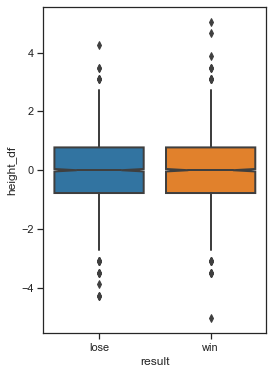

In [28]:
plt.figure(figsize = (4,6))
sns.boxplot(data=hdf, x='result', y='height_df',notch=True, showcaps=False)

height has no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = Reach:

In [29]:
rdf = (df[['result','fighter','opponent','method','weight class','f_reach','o_reach']]).copy()
rdf['reach_dif'] = rdf['f_reach'] - rdf['o_reach']
rdf['reach_dif'] = (rdf['reach_dif'] - np.mean(rdf['reach_dif']))/np.std(rdf['reach_dif'])
rdf.head(3)

,result,fighter,opponent,method,weight class,f_reach,o_reach,reach_dif
0,lose,Tai Tuivasa,Ciryl Gane,KO/TKO:Punches,Heavyweight,190.50,205.74,-1.848783
1,win,Robert Whittaker,Marvin Vettori,U-DEC:,Middleweight,185.42,187.96,-0.315379
2,lose,Joaquin Buckley,Nassourdine Imavov,U-DEC:,Middleweight,193.04,190.50,0.297982


<AxesSubplot:xlabel='result', ylabel='reach_dif'>

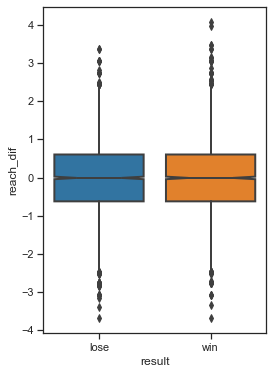

In [30]:
plt.figure(figsize = (4,6))
sns.boxplot(data=rdf, x='result', y='reach_dif',notch=True, showcaps=False)

no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = stance:

In [31]:
stance_df = (df[['result','fighter','opponent','f_stance','o_stance']]).copy()
stance_df['stance_combo'] = stance_df['f_stance'] + ':' + stance_df['o_stance']
stance_df.head(3)

,result,fighter,opponent,f_stance,o_stance,stance_combo
0,lose,Tai Tuivasa,Ciryl Gane,Southpaw,Orthodox,Southpaw:Orthodox
1,win,Robert Whittaker,Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw
2,lose,Joaquin Buckley,Nassourdine Imavov,Southpaw,Orthodox,Southpaw:Orthodox


### Functions setup:

In [32]:
def get_wins(combo, data=stance_df):

    data = data[(data.result=='win') & (data.stance_combo==combo)]
    return len(data)

In [33]:
def get_wins_ratio(combo, data=stance_df):
    
    combo_df = data[data.stance_combo==combo]
    return get_wins(combo, data=data)/len(combo_df)

In [34]:
stance_df['stance_win_ratio'] = None

for combo,i in zip(stance_df['stance_combo'],range(0,len(df))):
    stance_df.loc[i, 'stance_win_ratio'] = get_wins_ratio(combo)
    
stance_df.head(3)    

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,lose,Tai Tuivasa,Ciryl Gane,Southpaw,Orthodox,Southpaw:Orthodox,0.527694
1,win,Robert Whittaker,Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw,0.450051
2,lose,Joaquin Buckley,Nassourdine Imavov,Southpaw,Orthodox,Southpaw:Orthodox,0.527694


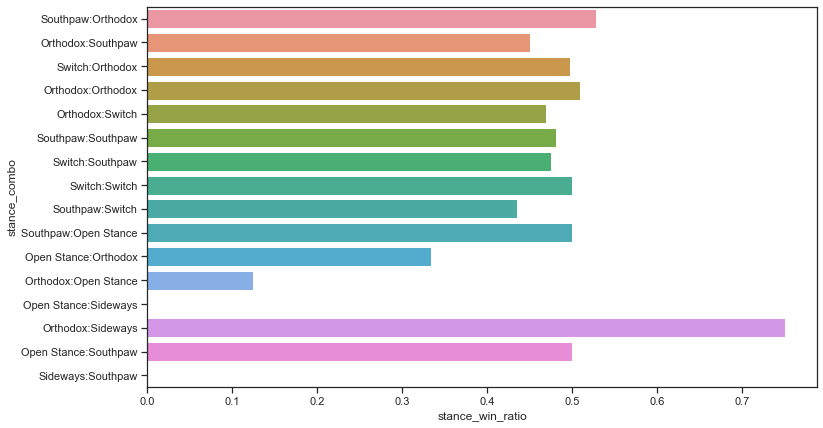

In [36]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")

* some stances gives significant edge ( >> 0.5) over its opponent stance,
* 1 or 0 stance_win_ratio is irrelevant (=only one time occured) so i will change it to 0.5 (=50:50 chance)

In [37]:
for i in range(0,len(stance_df)):
    
    if stance_df.loc[i,'stance_win_ratio'] == 1:
        stance_df.loc[i,'stance_win_ratio'] = 0.5
        
    if stance_df.loc[i,'stance_win_ratio'] == 0.0:
        stance_df.loc[i,'stance_win_ratio'] = 0.5 

# normalizing:
stance_df['stance_win_ratio'] = (stance_df['stance_win_ratio'] - np.mean(stance_df['stance_win_ratio']))/np.std(stance_df['stance_win_ratio'])        
stance_df.head(3)        

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,lose,Tai Tuivasa,Ciryl Gane,Southpaw,Orthodox,Southpaw:Orthodox,0.977409
1,win,Robert Whittaker,Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw,-1.677876
2,lose,Joaquin Buckley,Nassourdine Imavov,Southpaw,Orthodox,Southpaw:Orthodox,0.977409


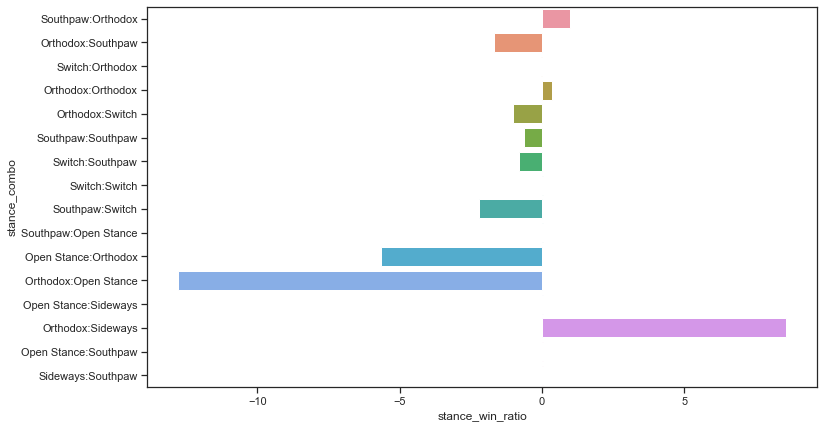

In [40]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")

In [41]:
features.append('stance_win_ratio')
df['stance_win_ratio'] = stance_df['stance_win_ratio']
print(features)

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio']


# <span style='color:green'> **[done]** </span> Feature Engineering = Win/Lose streak:

In [42]:
win_df = (df[['result','fighter','opponent','f_win_perc','o_win_perc','f_win_strk','o_win_strk','f_lose_strk','o_lose_strk']]).copy()
win_df.head(3)

,result,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,lose,Tai Tuivasa,Ciryl Gane,0.73,0.88,5,0,0,1
1,win,Robert Whittaker,Marvin Vettori,0.78,0.73,0,1,1,0
2,lose,Joaquin Buckley,Nassourdine Imavov,0.71,0.75,3,2,0,0


In [43]:
columns = ['win_perc','win_strk','lose_strk']

for column in columns:
    win_df[column + '_dif'] = win_df['f_' + column] - win_df['o_' + column]
    win_df[column + '_dif'] = (win_df[column + '_dif'] - np.mean(win_df[column + '_dif']))/np.std(win_df[column + '_dif'])
    
win_df = win_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif']]   
win_df.head()

,result,win_perc_dif,win_strk_dif,lose_strk_dif
0,lose,-0.371278,2.859438,-1.073841
1,win,0.140095,-0.569153,1.078610
2,lose,-0.090023,0.573711,0.002385
3,win,-1.010495,0.002279,1.078610
4,lose,0.012252,0.002279,0.002385


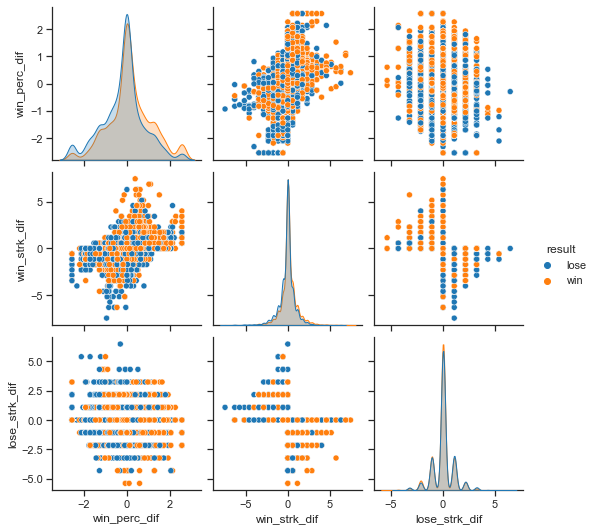

In [44]:
sns.pairplot(data=win_df, hue="result")

we can see very significant variance > might be the strongest predictor for fight's winner > will be included as features

In [45]:
new_features = win_df.columns[1:]
for feature in new_features:
    features.append(feature)
    df[feature] = win_df[feature]
    
print(features)    

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif']


# <span style='color:green'> **[done]** </span> saving Features data file:

In [46]:
df.head(2)

,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,lose,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,0.73,0.88,5,0,0,1,14.383,15.0,5.0,0,187.96,118.80,190.50,Southpaw,29.0,4.10,0.49,4.46,0.45,0.00,0.00,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,0.002599,-3.045557,0.016048,0.034102,-0.321766,-0.724971,-0.100173,-0.450266,-0.653889,-0.803783,1.341925,-1.445210,0.977409,-0.371278,2.859438,-1.073841
1,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0.78,0.73,0,1,1,0,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6,0.002599,1.541595,0.411124,0.034102,-0.573028,-0.233787,0.336079,-0.545860,0.160835,-0.154232,-0.208765,0.156732,-1.677876,0.140095,-0.569153,1.078610


In [47]:
columns = ['result','fighter','opponent','date','weight class','method',]
for feature in features:
    columns.append(feature)

final_df = df[columns]
final_df = final_df.dropna()
final_df.head(10)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,lose,Tai Tuivasa,Ciryl Gane,2022-09-03,Heavyweight,KO/TKO:Punches,0.002599,-3.045557,0.016048,0.034102,-0.321766,-0.724971,-0.100173,-0.450266,-0.653889,-0.803783,1.341925,-1.445210,0.977409,-0.371278,2.859438,-1.073841
1,win,Robert Whittaker,Marvin Vettori,2022-09-03,Middleweight,U-DEC:,0.002599,1.541595,0.411124,0.034102,-0.573028,-0.233787,0.336079,-0.545860,0.160835,-0.154232,-0.208765,0.156732,-1.677876,0.140095,-0.569153,1.078610
2,lose,Joaquin Buckley,Nassourdine Imavov,2022-09-03,Middleweight,U-DEC:,0.002599,-0.187987,-0.774104,-1.663470,0.247761,0.257397,-0.335077,-2.266552,-0.312842,-1.778109,0.594161,-0.686395,0.977409,-0.090023,0.573711,0.002385
3,win,Roman Kopylov,Alessio Di Chirico,2022-09-03,Middleweight,KO/TKO:Punches,1.356194,0.752003,0.016048,0.034102,-0.584195,-0.198702,0.134732,0.027704,0.059784,0.414125,0.214150,-0.096206,0.977409,-1.010495,0.002279,1.078610
4,lose,Jarno Errens,William Gomis,2022-09-03,Featherweight,U-DEC:,0.002599,-0.451184,-1.169179,0.882888,-1.650663,-2.093269,-2.012967,0.983644,-0.521260,-0.641395,0.477706,-0.686395,-1.677876,0.012252,0.002279,0.002385
5,lose,Charles Jourdain,Nathaniel Wood,2022-09-03,Featherweight,U-DEC:,0.002599,-0.413585,-1.564255,0.034102,-0.919211,-1.321409,-0.838444,-0.067890,-0.331789,0.089349,0.073178,0.072419,-0.050731,-0.524690,-0.569153,1.078610
6,lose,Dustin Stoltzfus,Abus Magomedov,2022-09-03,Middleweight,KO/TKO:Punches,-1.350995,-0.263186,0.016048,0.034102,1.007130,1.239766,1.544159,0.505674,-12.110549,-4.782282,1.997750,-4.564782,0.353931,0.651469,0.573711,0.002385
7,win,Nasrat Haqparast,John Makdessi,2022-09-03,Lightweight,U-DEC:,1.356194,-0.338385,0.806200,0.034102,0.225426,1.064343,-0.234404,0.027704,-0.306526,-0.479008,0.404156,-0.349144,0.977409,-0.115592,-0.569153,2.154836
8,lose,Michal Figlak,Fares Ziam,2022-09-03,Lightweight,U-DEC:,0.002599,-1.203176,-0.774104,0.034102,0.046751,-0.163617,-0.435751,0.027704,-0.426525,-1.209752,1.397087,-1.866774,0.353931,-1.266182,0.002279,-1.073841
9,win,Benoit Saint Denis,Gabriel Miranda,2022-09-03,Lightweight,KO/TKO:Punch,4.063383,0.827202,0.016048,0.034102,0.309180,-0.093448,2.852913,1.079238,0.343990,-0.154232,-0.778782,0.325358,0.977409,1.290686,0.573711,0.002385


In [48]:
final_df.to_csv('data/ufc_data_features.csv')